In [3]:
import pandas as pd

firearms_df = pd.read_csv("firearms.tsv", sep="\t")
firearms_count_per_neighborhood = firearms_df['neighborhood'].value_counts().reset_index()
firearms_count_per_neighborhood.columns = ['Neighborhood', 'Firearms Seized']

firearms_seized_df = firearms_count_per_neighborhood.copy().sort_values(by='Neighborhood', ascending=True)

population_df = pd.read_csv("population.tsv", sep="\t")

# Fix different names for neighborhoods
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Arlington - Arlington Heights (Combined)", "Arlington")
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Central Business District (Downtown)", "Central Business District")
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Spring Hill-City", "Spring Hill-City View")

neighborhood_pop = population_df[["Neighborhood", "2020_Total_Population"]]

# Merge the population information by neighborhood
firearms_seized_with_pop = pd.merge(firearms_seized_df, neighborhood_pop, on="Neighborhood", how="left")

# Fix differences between neighborhood distinctions
firearms_seized_with_pop['Neighborhood'] = firearms_seized_with_pop['Neighborhood'].replace("Mount Oliver Borough", "Mt. Oliver")
firearms_seized_with_pop['Neighborhood'] = firearms_seized_with_pop['Neighborhood'].replace("Arlington Heights", "Arlington")
firearms_seized_with_pop = firearms_seized_with_pop.groupby('Neighborhood').sum().reset_index()


In [4]:
# array to store the percentages
percentages = []

for index, row in firearms_seized_with_pop.iterrows():
    neighborhood = row['Neighborhood']
    total_population = row['2020_Total_Population']
    
    # Exclude 'Neighborhood' and '2020_Total_Population' columns
    columns_to_exclude = ['Neighborhood', '2020_Total_Population']
    row_data = row.drop(labels=columns_to_exclude)
    
    # Calculate and print percentages
    print(f"{neighborhood}")
    for column_name, column_value in row_data.iteritems():
        percentage = (column_value / total_population) * 100
        print(f"Percentage of Firearms Seized: {percentage:.2f}%")
    print()  

Allegheny Center
Percentage of Firearms Seized: 1.13%

Allegheny West
Percentage of Firearms Seized: 2.96%

Allentown
Percentage of Firearms Seized: 2.91%

Arlington
Percentage of Firearms Seized: 1.76%

Banksville
Percentage of Firearms Seized: 0.24%

Bedford Dwellings
Percentage of Firearms Seized: 4.98%

Beechview
Percentage of Firearms Seized: 0.86%

Beltzhoover
Percentage of Firearms Seized: 2.68%

Bloomfield
Percentage of Firearms Seized: 0.44%

Bluff
Percentage of Firearms Seized: 0.85%

Bon Air
Percentage of Firearms Seized: 1.05%

Brighton Heights
Percentage of Firearms Seized: 1.15%

Brookline
Percentage of Firearms Seized: 0.39%

California-Kirkbride
Percentage of Firearms Seized: 4.09%

Carrick
Percentage of Firearms Seized: 1.14%

Central Business District
Percentage of Firearms Seized: 2.04%

Central Lawrenceville
Percentage of Firearms Seized: 0.49%

Central Northside
Percentage of Firearms Seized: 1.99%

Central Oakland
Percentage of Firearms Seized: 0.27%

Chartiers Ci

In [6]:
# Dictionary to store percentages with neighborhoods
percentages_with_neighborhood = {} 

for index, row in firearms_seized_with_pop.iterrows():
    neighborhood = row['Neighborhood']
    total_population = row['2020_Total_Population']
    
    # Exclude 'Neighborhood' and '2020_Total_Population' columns
    columns_to_exclude = ['Neighborhood', '2020_Total_Population']
    row_data = row.drop(labels=columns_to_exclude)
    
    # Calculate and store percentages
    neighborhood_percentages = {}
    for column_name, column_value in row_data.iteritems():
        percentage = (column_value / total_population) * 100
        neighborhood_percentages[column_name] = percentage
    
    percentages_with_neighborhood[neighborhood] = neighborhood_percentages

In [14]:
# Sort the dictionary
sorted_percentages = sorted(percentages_with_neighborhood.items(), key=lambda x: max(x[1].values()))

# Print the bottom 10 neighborhoods
print("10 neighborhoods with lowest percents of seized firearms per capita:")
n = 1
print()
for neighborhood, percentages in sorted_percentages[:10]:
    lowest_percentage = min(percentages.values())
    print(n, f"{neighborhood}: {lowest_percentage:.2f}%")
    n+=1

10 neighborhoods with lowest percents of seized firearms per capita:

1 Swisshelm Park: 0.07%
2 Squirrel Hill North: 0.08%
3 North Oakland: 0.14%
4 Friendship: 0.15%
5 Shadyside: 0.16%
6 Summer Hill: 0.20%
7 Squirrel Hill South: 0.22%
8 Banksville: 0.24%
9 Lincoln Place: 0.25%
10 Central Oakland: 0.27%


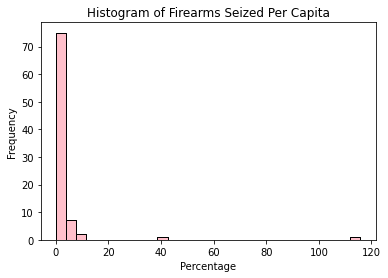

In [31]:
import matplotlib.pyplot as plt

# Extract percentages
column_name = 'Firearms Seized'
percentages = [value[column_name] for value in percentages_with_neighborhood.values()]

# Create the histogram
plt.hist(percentages, bins=30, color='pink', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name} Per Capita')
plt.show()

# Conclusion
The submetric I chose to determine the best Pittsburgh neighborhood was the number of firearms seized by the police. By examining the number of illegal weapons in possession, this dataset provides us with an estimate of the neighborhood's safety. If a neighborhood has had many firearms taken from its residents, then it might not be very safe. Using this submetric of safety, Swisshelm Park is the safest Pittsburgh neighborhood because it has the smallest percentage of firearms seized per capita. One thing to note in the histogram is that the data is skewed left, which shows how most of the neighborhoods had a small percentage per capita. So although Swisshelm Park had the lowest percentage, it was not an abnormal data point.